<a href="https://colab.research.google.com/github/haron1100/MLSummerSchool/blob/master/Session_8_SkLearn_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/gdrive/My Drive/data/BikeSharingDaily.csv')

def mse_cost(y, y_pred):
    diffs = y-y_pred
    squared_diffs = np.square(diffs)
    mean_squared_diff = np.mean(squared_diffs)
    return mean_squared_diff

In [4]:
from sklearn.linear_model import LinearRegression

In [13]:
features = [df['temp'], df['hum']]

x = np.stack(features, axis=1)
y = np.array(df['cnt'])

print(x.shape)
print(y.shape)

train_split = 300

x_train = x[:train_split]
y_train = y[:train_split]

(731, 2)
(731,)


In [14]:
model = LinearRegression()

In [15]:
model = model.fit(x_train, y_train)

In [16]:
y_pred = model.predict(x)

cost 3502025.1938333297


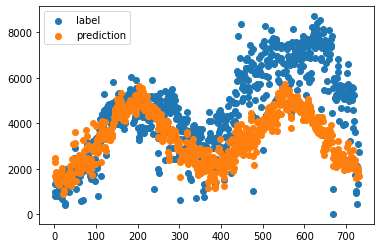

In [17]:
cost = mse_cost(y, y_pred)
print('cost', cost)
plt.scatter(df['instant'], y, label="label")
plt.scatter(df['instant'], y_pred, label="prediction")
plt.legend()
plt.show()

In [ ]:
#logistic regression

In [55]:
df = pd.read_csv('/content/gdrive/My Drive/data/iris.csv')

species_to_num = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

num_to_species = {
    0:'Iris-setosa',
    1:'Iris-versicolor',
    2:'Iris-virginica'
}

df['class'] = df['class'].map(species_to_num)

In [78]:
features = [df[df.columns[0]], df[df.columns[1]], df[df.columns[2]], df[df.columns[3]]]

x = np.stack(features, axis=1)
y = np.array(df['class'])

x_train = x[::4]
y_train = y[::4]

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [91]:
#model = LogisticRegression()
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
y_pred = model.predict(x)

In [92]:
accuracy = model.score(x, y)
print('Accuracy', accuracy)

Accuracy 0.96


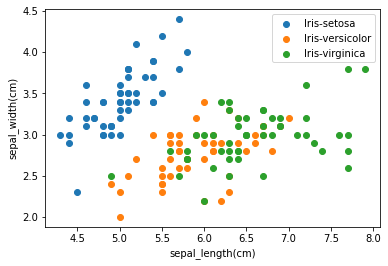

In [93]:
groups = df.groupby('class')
for name, group in groups:
    plt.scatter(group['sepal_length(cm)'], group['sepal_width(cm)'], label=num_to_species[name])
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.legend()

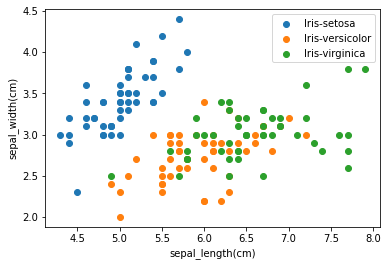

In [94]:
for unique_val in np.unique(y):
    xs = x[y_pred==unique_val]
    plt.scatter(xs[:, 0], xs[:, 1], label=num_to_species[unique_val])

plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.legend()

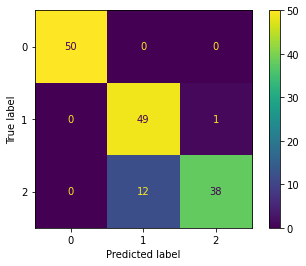

In [84]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x, y)

In [85]:
# dataset has 100 pics, 95 of dogs, 5 of cats
# our algorithm predicts dog everytime

#dog category 
#precision 95 / 95 + 5 = 0.95
#recall 95 / 95 + 0 = 1

#cat category
#precision 0 / 0 + 0 = 0
#recall 0 / 0 + 5 = 0

#mean precision = 0.475
#mean recall = 0.5
#accuracy = 0.95
#f1 score is harmonic mean of precision and recall

In [86]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred, average="weighted")
print('F1 score', f1)

F1 score 0.9122718223841821
